In [1]:
import numpy as np
import pionSSA as pion
import matplotlib.pyplot as plt
import importlib
importlib.reload(pion)

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 25  
plt.rcParams["xtick.labelsize"] = 20  
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 18  
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.xmargin'] = 0


In [10]:
ssa = pion.PionSSA(fit_type='pp')

ts = np.linspace(0.01, 0.1, 10)
s = 140**2
Q = np.sqrt(10)
x = 0.01

kins = pion.Kinematics(s=s, Q=Q, x=x, t=0.1)
kins.y = (kins.Q**2)/(kins.s * kins.x)
assert kins.y < 1, f'error: y={kins.y}>1'

harms = ['sin(phi)', 'sin(2phi)']
ssas = {h: {tp: [] for tp in ['num', 'den', 'ssa']} for h in harms}

model_params = [
    [25.11, 0.033, 0.556, 0.3],
    [24.63, 0.062, 0.562, 0.3],
    [24.05, 0.099, 0.570, 0.3],
    [23.59, 0.128, 0.576, 0.3],
    [23.48, 0.135, 0.578, 0.3],
    [22.93, 0.171, 0.585, 0.3],
    [22.39, 0.207, 0.593, 0.3],
    [21.88, 0.242, 0.601, 0.3],
    [21.38, 0.277, 0.608, 0.3],
    [20.90, 0.311, 0.616, 0.3],
    [20.72, 0.325, 0.618, 0.3]
]


nreps = 100
for irep in range(1, nreps):
    ssa.set_params(irep)
# for irep, params in enumerate(model_params):
#     ssa = pion.PionSSA(replica=5, fit_type='pp', pion_model_params=params)

    for h in harms:
        rep = {tp: [] for tp in ['num', 'den', 'ssa']}
        for t in ts:
            kins.t = t
            rep_point = ssa.get_ssa(kins, harmonic=h)
            for tp in ['num', 'den', 'ssa']: rep[tp].append(rep_point[tp])
        for tp in ['num', 'den', 'ssa']: ssas[h][tp].append(rep[tp])


--> loaded params from /dipoles/replica_params_pp.csv
--> loaded replica 1
--> using model HZW for pion LCWF with parameters [25.11, 0.033, 0.556, 0.3]
--> loaded replica 1
--> loaded replica 2
--> loaded replica 3
--> loaded replica 4
--> loaded replica 5
--> loaded replica 6
--> loaded replica 7
--> loaded replica 8
--> loaded replica 9
--> loaded replica 10
--> loaded replica 11
--> loaded replica 12
--> loaded replica 13
--> loaded replica 14
--> loaded replica 15
--> loaded replica 16
--> loaded replica 17
--> loaded replica 18
--> loaded replica 19
--> loaded replica 20
--> loaded replica 21
--> loaded replica 22
--> loaded replica 23
--> loaded replica 24
--> loaded replica 25
--> loaded replica 26
--> loaded replica 27
--> loaded replica 28
--> loaded replica 29
--> loaded replica 30
--> loaded replica 31
--> loaded replica 32
--> loaded replica 33
--> loaded replica 34
--> loaded replica 35
--> loaded replica 36
--> loaded replica 37
--> loaded replica 38
--> loaded replica 39

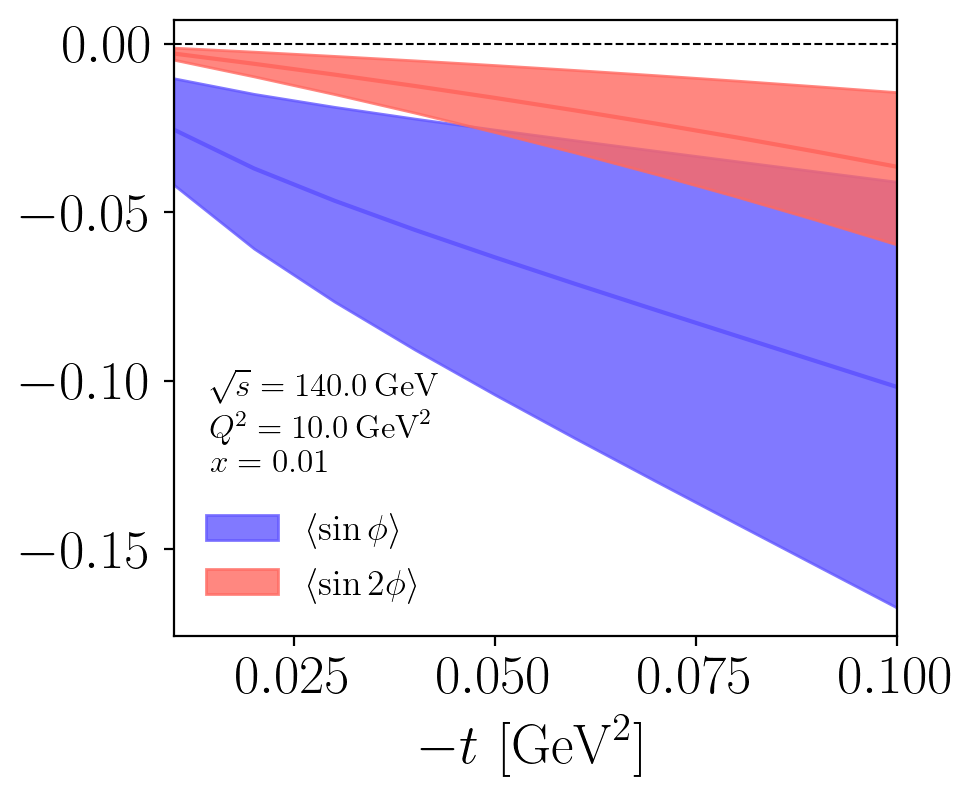

In [31]:
asp_ratio = 3.5/3
psize = 4
nrows, ncols = 1,1
fig, ax = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*ncols, psize*nrows))

plot_band = True
plot_mean = True
plot_bandwidth = False
save_plot = True

colors = ['#6257ff','#FF6961']
labels = [r'$\langle \sin \phi \rangle$', r'$\langle \sin 2 \phi \rangle$']

for ih, h in enumerate(harms):
    if ih == 1: 
        xf = 1
        # labels[ih] += rf'$\times {xf}$'
    else: xf = 1
    
    data = ssas[h]['ssa']
    bands = ssa.get_bands(data)
    if plot_band:
        ax.fill_between(ts, xf*bands['lower'], xf*bands['upper'], alpha=0.8, color=colors[ih], label=labels[ih])
        if plot_mean: ax.plot(ts, xf*bands['mean'], alpha=1.0, color=colors[ih])
    elif plot_bandwidth:
        width = np.abs(np.array(bands['upper']) - np.array(bands['lower']))
        ax.plot(ts, np.abs(width/np.array(bands['mean'])), alpha=1.0, color=colors[ih], label=labels[ih])
        ax.semilogy()
    else:
        for irep, rep in enumerate(data):
            if irep == 0: label=labels[ih]
            else: label = None
            ax.plot(ts, xf*rep, alpha=0.5, color=colors[ih], label=label, linewidth=0.5)

ax.set_xlabel(r'$-t\,\,[\mathrm{GeV}^2]$', size=20)
ax.axhline(y=0, linestyle='--', color='black', linewidth=0.75)
# ax.axvline(x=0.05, linestyle='--', color='gray', linewidth=0.75)
# ax.semilogx()
# ax.set_ylim([-0.05, -0.049])
# ax.set_xlim([0.043, 0.047])

# s = 140**2
# Q = np.sqrt(10)
# x = 0.01
kins_info = rf'''
$\sqrt{{s}}={np.sqrt(s)}\, \mathrm{{GeV}}$
$Q^2={round(Q**2, 2)}\,\mathrm{{GeV}}^2$
$x={x}$
'''
ax.text(
    0.05, 0.2, kins_info,
    transform=ax.transAxes,
    ha='left', va='bottom', 
    fontsize=12, wrap=True, 
    # color=colors[iz],
    # bbox=dict(boxstyle='round', facecolor='white', alpha=1.0, edgecolor='black')
)

ax.legend(frameon=False, fontsize=13)

plt.show()

if save_plot: fig.savefig('plots/pion_ssa_harmonics_icvar.pdf', dpi=400)
